Exercise: Monthly Retail Sales Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1. Create a CSV of Sales Data

Save this as sales_data.csv in Colab.

Read it using pd.read_csv() and print the full DataFrame.

In [3]:
import pandas as pd

data="""Month,Store,Sales
Jan,Store A,12000
Jan,Store B,15000
Feb,Store A,18000
Feb,Store B,17000
Mar,Store A,16000
Mar,Store B,19000"""


with open("/content/drive/MyDrive/Colab Notebooks/sales_data.csv",'w') as f:
  f.write(data)

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv')
print(df)

  Month    Store  Sales
0   Jan  Store A  12000
1   Jan  Store B  15000
2   Feb  Store A  18000
3   Feb  Store B  17000
4   Mar  Store A  16000
5   Mar  Store B  19000


2. Total Sales Per Store

Group the data by Store and calculate total sales for each store.

Identify which store had higher total sales.

In [6]:
total_sales=df.groupby('Store')['Sales'].sum()
print(total_sales)

Store
Store A    46000
Store B    51000
Name: Sales, dtype: int64


In [8]:
high_total_sale=total_sales.idxmax()
print(high_total_sale,total_sales.max())

Store B 51000


3. Monthly Sales Trend

Group the data by Month and sum up the total sales (Store A + Store B).

Print the result.

In [12]:
total_sales_by_month=df.groupby('Month')['Sales'].sum()
print(total_sales_by_month)

Month
Feb    35000
Jan    27000
Mar    35000
Name: Sales, dtype: int64


4. Chart: Monthly Sales by Store

Create a line chart showing monthly sales for both Store A and Store B.

X-axis: Month

Y-axis: Sales

Two lines: Store A and Store B

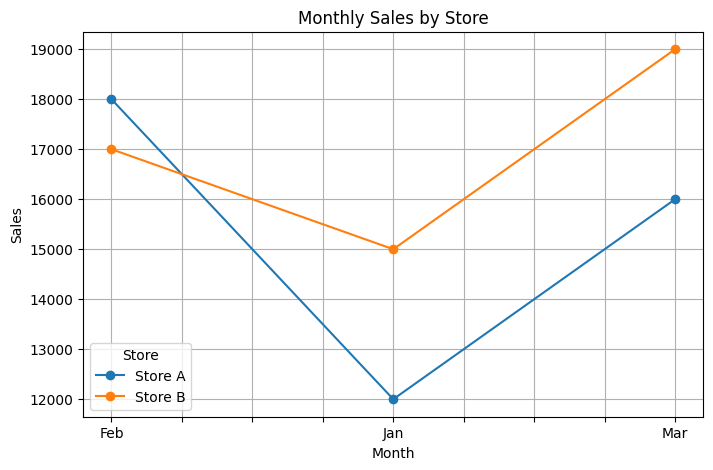

In [32]:
import matplotlib.pyplot as plt

pivot_df=df.pivot(index='Month',columns='Store',values='Sales')
pivot_df.plot(kind='line',figsize=(8,5),marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Store')
plt.grid(True)
plt.title('Monthly Sales by Store')
plt.show()


5. Bonus

Create a bar chart showing total sales per store.

Add data labels on top of each bar.

Save this chart as an image ( sales_chart.png ).



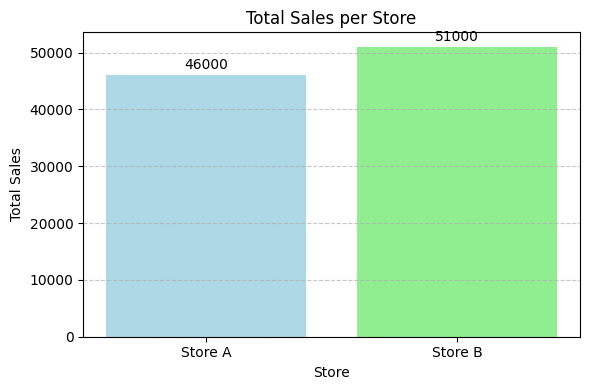

In [58]:
plt.figure(figsize=(6, 4))
bars = plt.bar(total_sales.index, total_sales.values, color=['lightblue', 'lightgreen'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{height}', ha='center', va='bottom', fontsize=10)
plt.title('Total Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('sales_chart.png')
plt.show()